In [0]:
from keras.layers import Input, Dense
from keras.models import Model

In [0]:
# Kích thước của code/representation
encoding_dim = 32

# Đầu vào
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [0]:
encoder = Model(input_img, encoded)

In [0]:
encoded_input = Input(shape=(encoding_dim,))
decoded_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoded_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [0]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [0]:
# alternative reshape
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=512,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.4345 - val_loss: 0.2811
Epoch 2/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.2756 - val_loss: 0.2703
Epoch 3/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.2671 - val_loss: 0.2617
Epoch 4/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.2571 - val_loss: 0.2502
Epoch 5/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.2452 - val_loss: 0.2379
Epoch 6/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.2337 - val_loss: 0.2267
Epoch 7/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.2234 - val_loss: 0.2171
Epoch 8/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.2148 - val_loss: 0.2094
Epoch 9/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.2078 - val_loss: 0.2033
Epoch

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

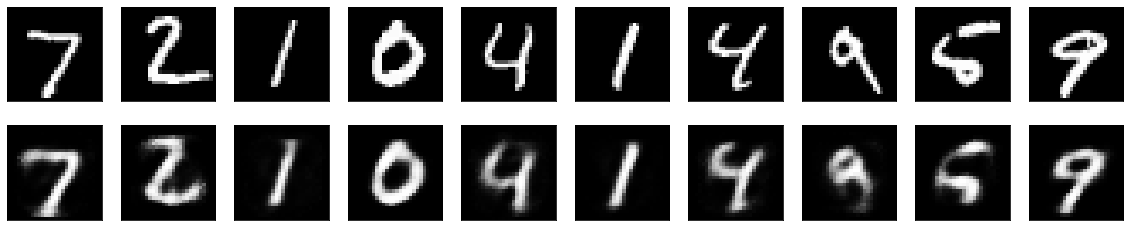

In [0]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()